In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
#Mounmting to you own Google Colab drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [7]:
#The jupyter-notebook and dataset should be first placed in your Google drive under the folder name "ML2021"
#The following command is meant to set the directory as the current, in which this notebook will load the datasset from.
%cd '/gdrive/MyDrive/ML2021'

/gdrive/MyDrive/ML2021


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import necessary libraries

In [9]:
!pip install aif360

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.1/214.1 kB 4.6 MB/s eta 0:00:00


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from aif360.algorithms.preprocessing import Reweighing
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset



pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'


# Load the dataset

In [13]:
df=pd.read_excel('/content/Kaggle.xlsx')
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0


# Display basic information about the dataset

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB
None


data contains 1924 rows


# Display summary statistics of the dataset

In [15]:
print(df.describe())

       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.1393

summary statistics

## Select relevant columns

In [16]:

selected_columns = [
    'PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'GENDER',
    'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
    'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
    'HTN', 'IMMUNOCOMPROMISED',
    'HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN',
    'ALBUMIN_MEDIAN', 'BE_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEDIAN',
    'BILLIRUBIN_MEDIAN',
    'ICU'  # Target variable
]

df = df[selected_columns]
df

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEDIAN,BILLIRUBIN_MEDIAN,ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.283019,-0.586207,NaN,NaN,NaN,NaN,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.132075,-0.586207,NaN,NaN,NaN,NaN,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,0.605263,-1.000000,-0.317073,-0.938950,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.188679,-0.379310,0.000000,-0.871658,-0.317073,-0.979069,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056604,-0.517241,NaN,NaN,NaN,NaN,0
1921,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.113208,-0.586207,0.605263,-1.000000,-0.317073,-0.982208,0
1922,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.169811,-0.586207,NaN,NaN,NaN,NaN,0
1923,384,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.188679,-0.655172,NaN,NaN,NaN,NaN,0


# Data Exploration and Cleaning

## # 1. Target Variable Exploration

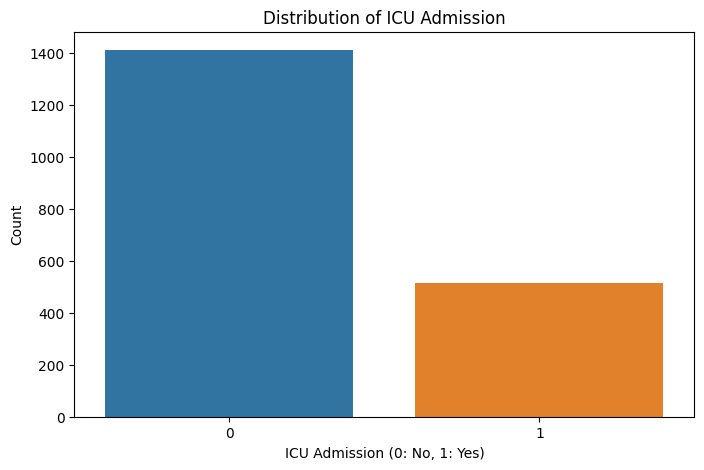

In [17]:

plt.figure(figsize=(8, 5))
sns.countplot(x='ICU', data=df)
plt.title('Distribution of ICU Admission')
plt.xlabel('ICU Admission (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# 2 Check for class imbalance

In [18]:
class_distribution = df['ICU'].value_counts(normalize=True) * 100
print("Class Distribution (%):")
print(class_distribution)

Class Distribution (%):
0    73.246753
1    26.753247
Name: ICU, dtype: float64


# Plot categorical feature distributions

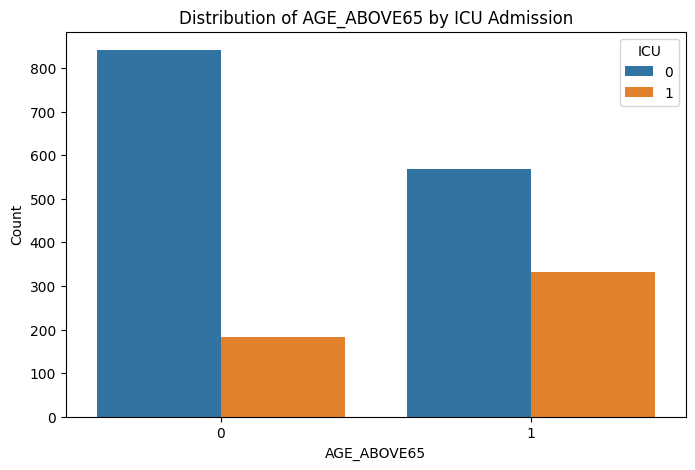

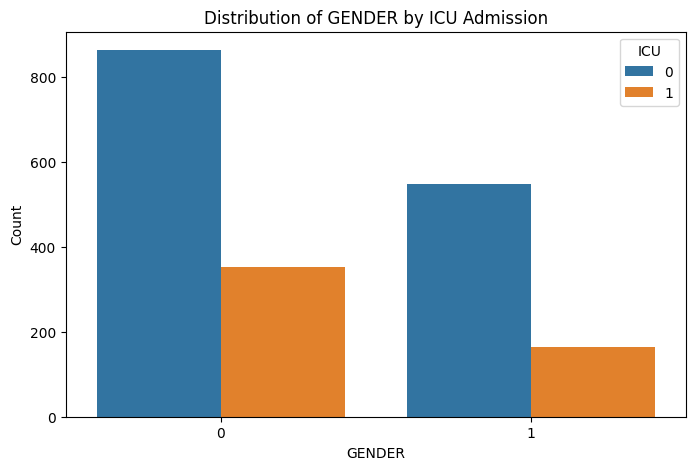

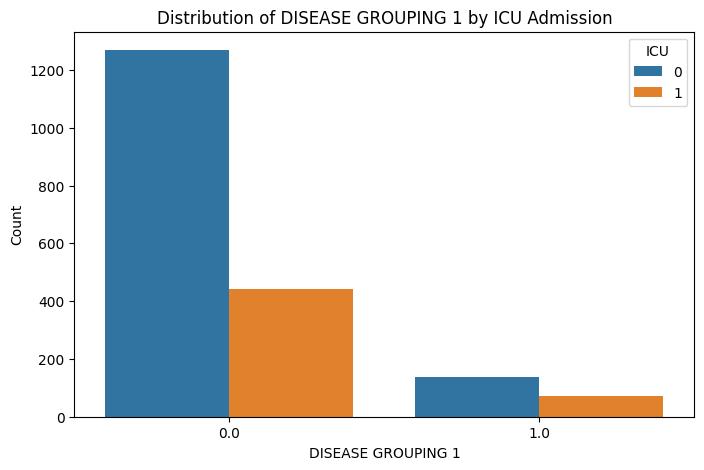

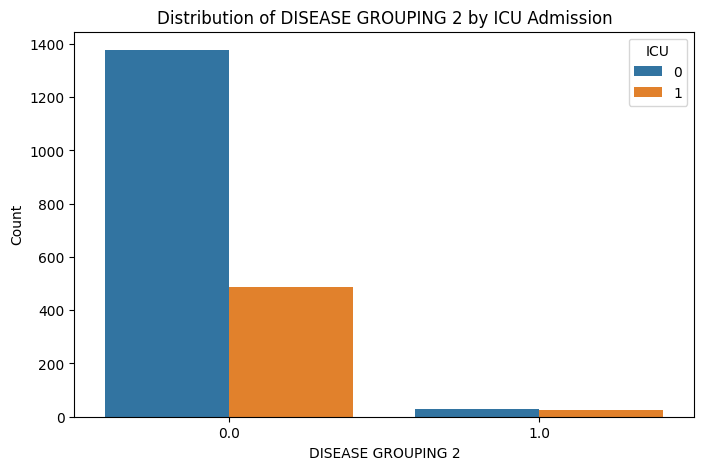

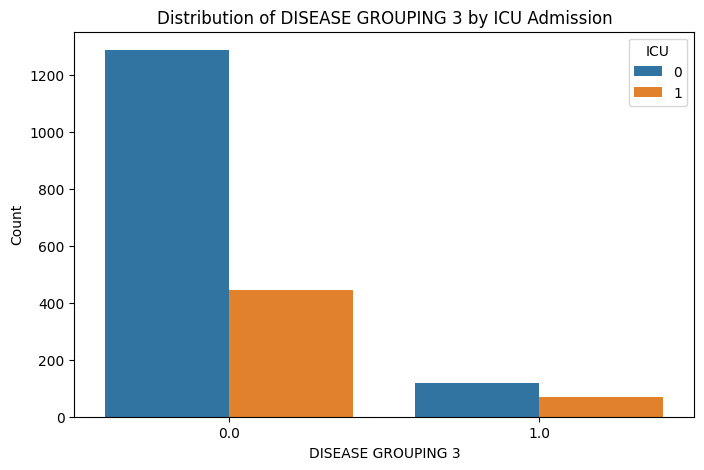

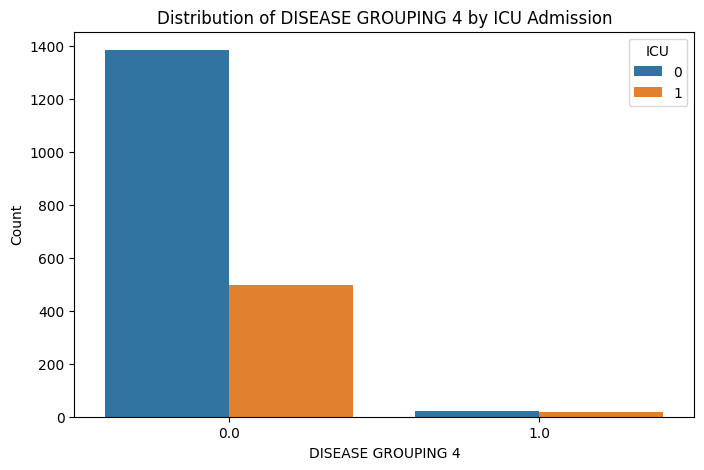

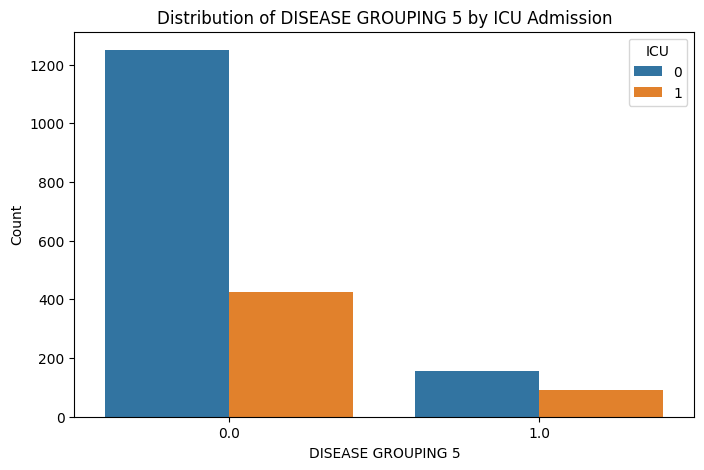

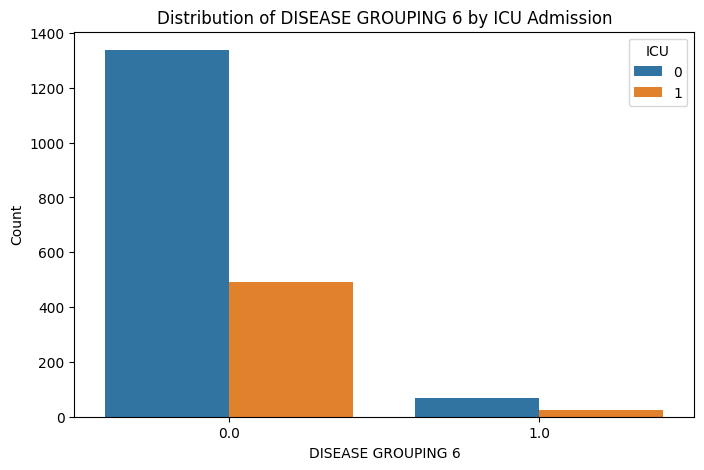

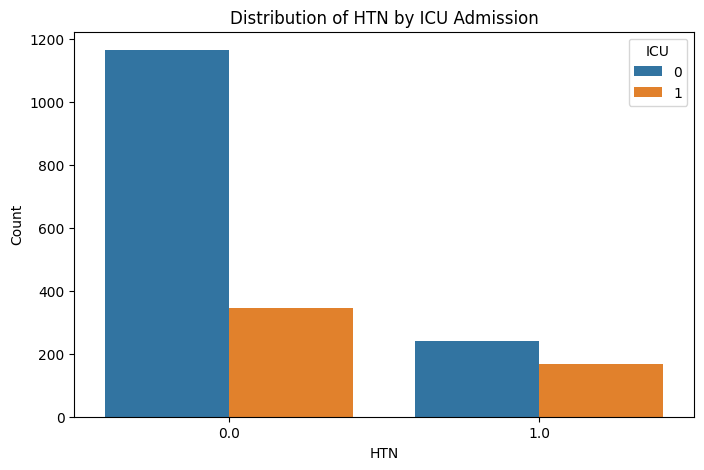

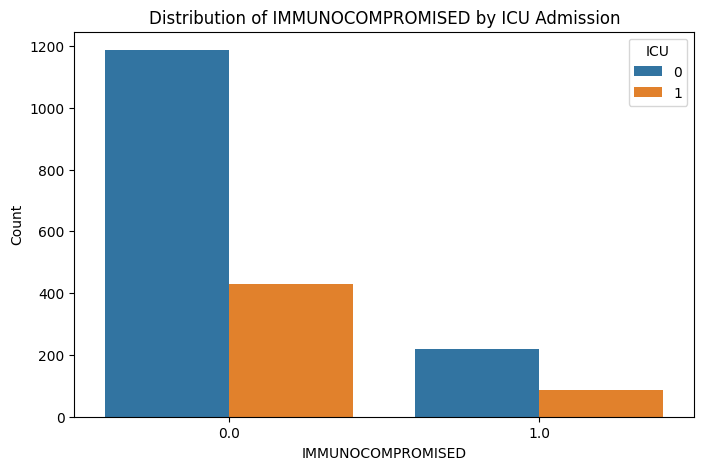

In [19]:
categorical_features = [
    'AGE_ABOVE65', 'GENDER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2',
    'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5',
    'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED'
]


for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=feature, hue='ICU', data=df)
    plt.title(f'Distribution of {feature} by ICU Admission')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

##  Plot continuous feature distributions

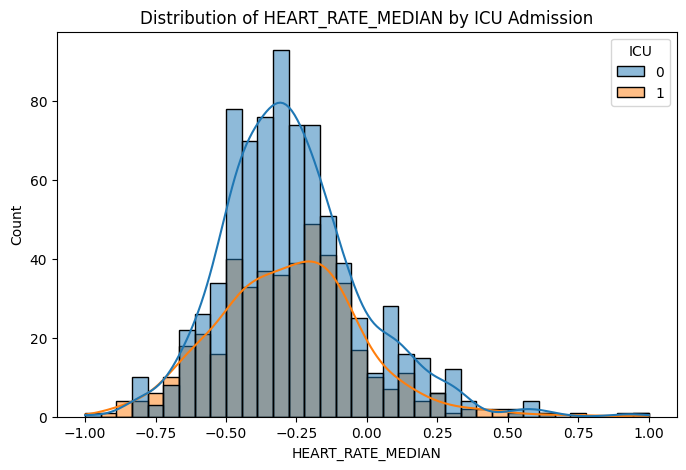

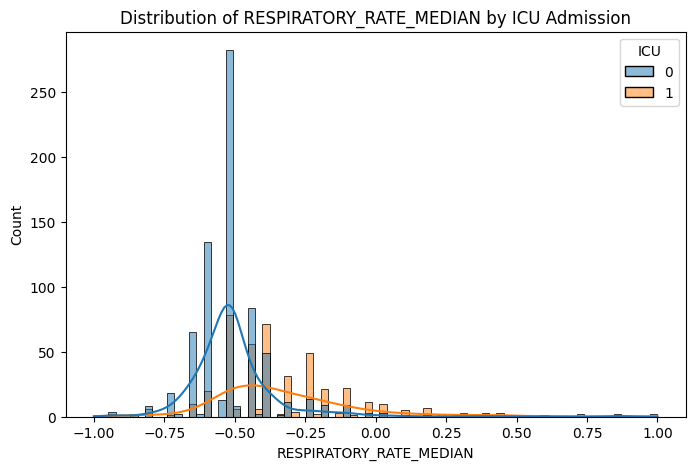

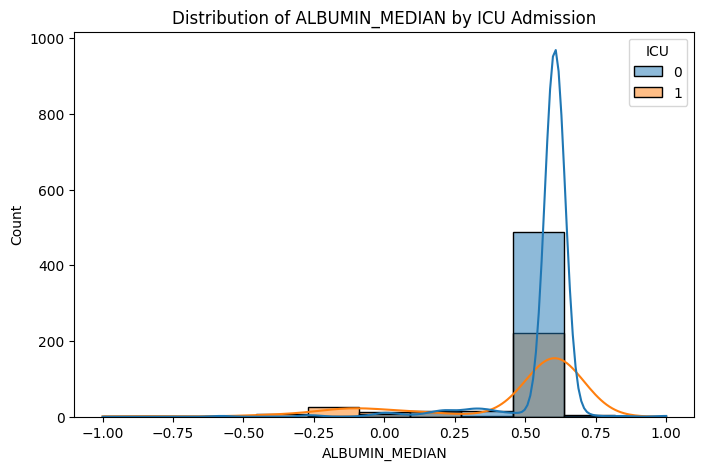

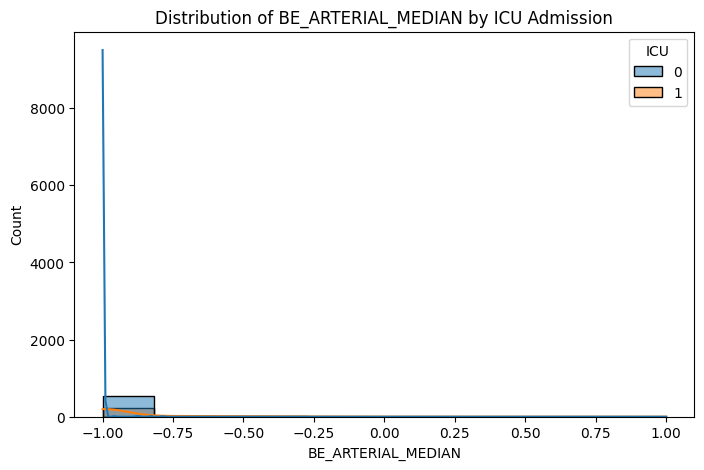

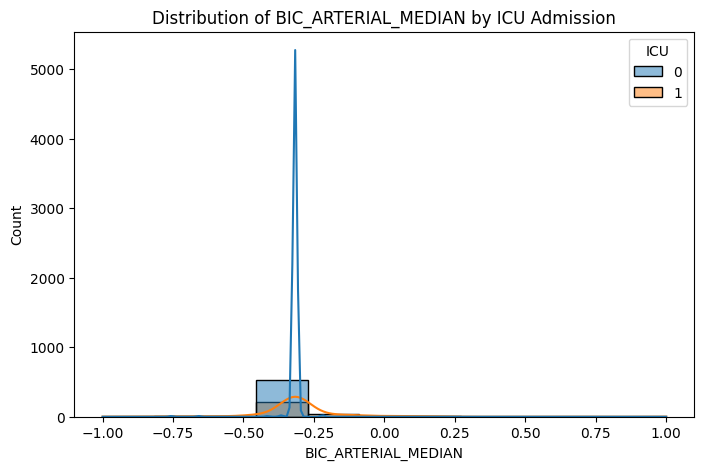

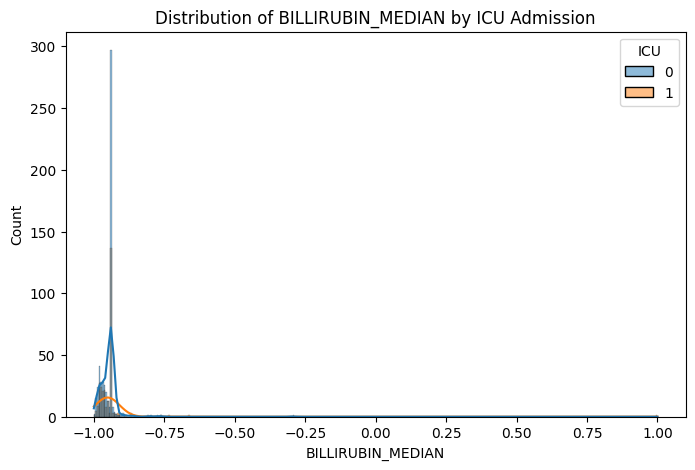

In [20]:
# Continuous Features
continuous_features = [
    'HEART_RATE_MEDIAN', 'RESPIRATORY_RATE_MEDIAN',
    'ALBUMIN_MEDIAN', 'BE_ARTERIAL_MEDIAN', 'BIC_ARTERIAL_MEDIAN',
    'BILLIRUBIN_MEDIAN'
]


for feature in continuous_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(x=feature, hue='ICU', data=df, kde=True)
    plt.title(f'Distribution of {feature} by ICU Admission')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# 3. Correlation Analysis

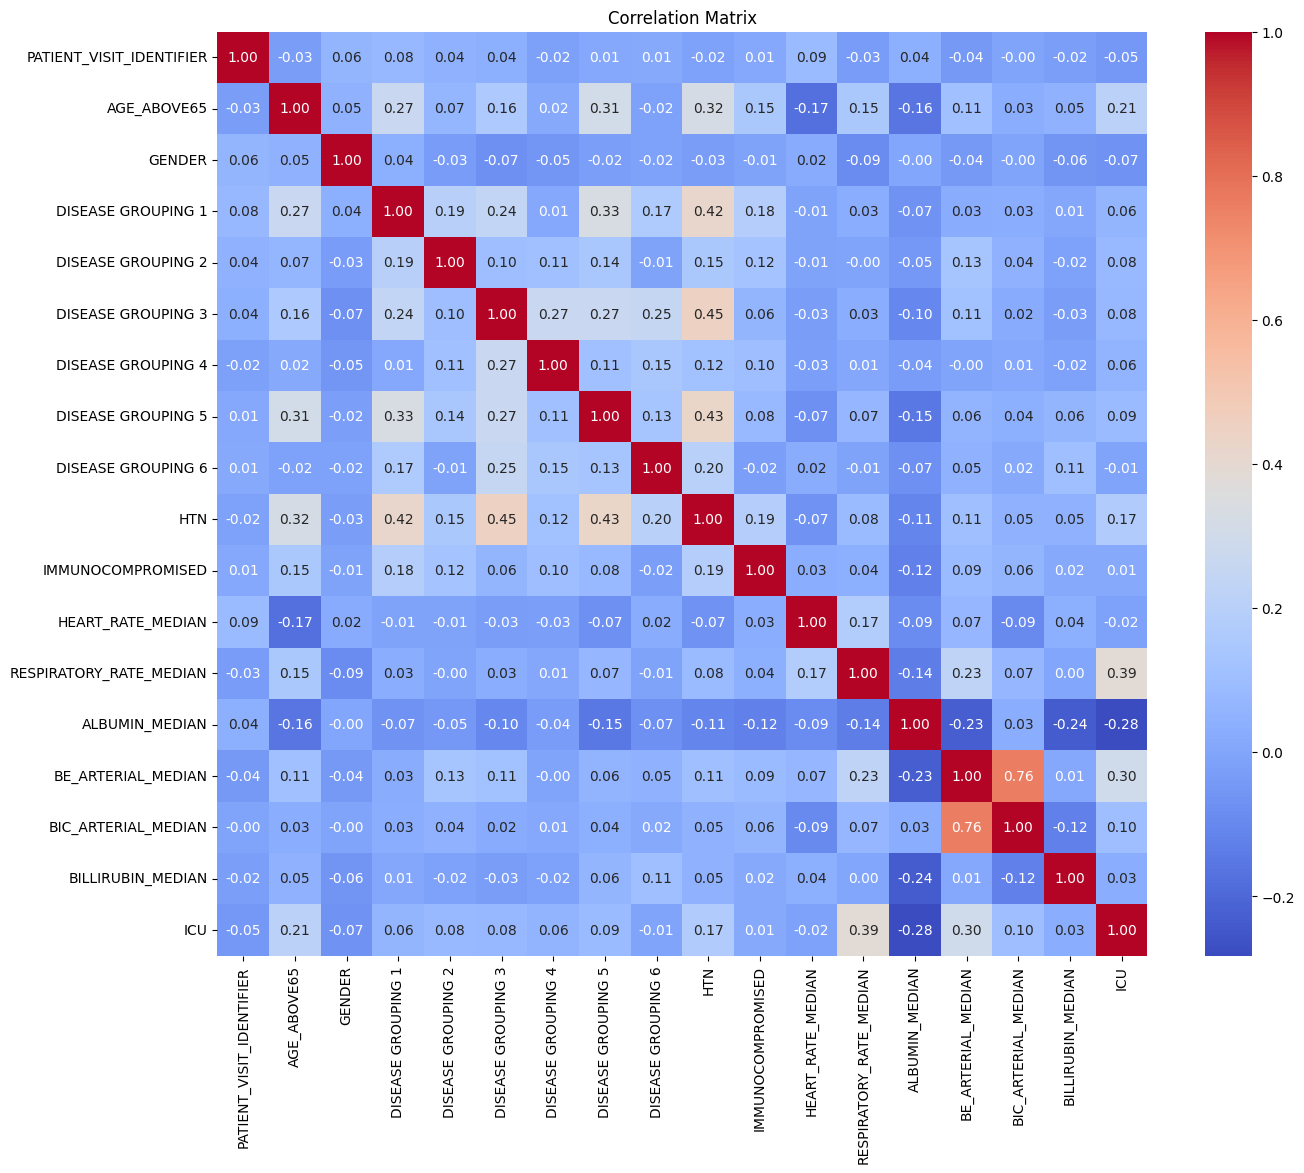

In [21]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
# Correlation with the target variable
target_correlation = correlation_matrix['ICU'].sort_values(ascending=False)
target_correlation

ICU                         1.000000
RESPIRATORY_RATE_MEDIAN     0.387823
BE_ARTERIAL_MEDIAN          0.298721
AGE_ABOVE65                 0.212198
HTN                         0.170247
BIC_ARTERIAL_MEDIAN         0.103378
DISEASE GROUPING 5          0.087988
DISEASE GROUPING 2          0.081883
DISEASE GROUPING 3          0.077422
DISEASE GROUPING 1          0.061308
DISEASE GROUPING 4          0.057456
BILLIRUBIN_MEDIAN           0.028567
IMMUNOCOMPROMISED           0.014357
DISEASE GROUPING 6         -0.006344
HEART_RATE_MEDIAN          -0.016677
PATIENT_VISIT_IDENTIFIER   -0.047547
GENDER                     -0.065543
ALBUMIN_MEDIAN             -0.282270
Name: ICU, dtype: float64

# Hypothesis 1: Older patients are more likely to be admitted to the ICU
# Hypothesis 2: Gender has an impact on the likelihood of ICU admission

# Data Preparation for ML

## Check for missing values

In [23]:
print(df.isnull().sum())

PATIENT_VISIT_IDENTIFIER       0
AGE_ABOVE65                    0
GENDER                         0
DISEASE GROUPING 1             5
DISEASE GROUPING 2             5
DISEASE GROUPING 3             5
DISEASE GROUPING 4             5
DISEASE GROUPING 5             5
DISEASE GROUPING 6             5
HTN                            5
IMMUNOCOMPROMISED              5
HEART_RATE_MEDIAN            685
RESPIRATORY_RATE_MEDIAN      748
ALBUMIN_MEDIAN              1104
BE_ARTERIAL_MEDIAN          1104
BIC_ARTERIAL_MEDIAN         1104
BILLIRUBIN_MEDIAN           1104
ICU                            0
dtype: int64


In [24]:
# Identify duplicates
duplicate_rows = df[df.duplicated(subset=['PATIENT_VISIT_IDENTIFIER'], keep=False)]
print("Duplicate Rows based on PATIENT_VISIT_IDENTIFIER:")
print(duplicate_rows)

Duplicate Rows based on PATIENT_VISIT_IDENTIFIER:
      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  GENDER  DISEASE GROUPING 1  \
0                            0            1       0                 0.0   
1                            0            1       0                 0.0   
2                            0            1       0                 0.0   
3                            0            1       0                 0.0   
4                            0            1       0                 0.0   
...                        ...          ...     ...                 ...   
1920                       384            0       1                 0.0   
1921                       384            0       1                 0.0   
1922                       384            0       1                 0.0   
1923                       384            0       1                 0.0   
1924                       384            0       1                 0.0   

      DISEASE GROUPING 2  DISEASE GROUPING 3  DIS

## Drop rows with missing values

In [25]:
df = df.dropna()
# Check for missing values again
print(df.isnull().sum())

PATIENT_VISIT_IDENTIFIER    0
AGE_ABOVE65                 0
GENDER                      0
DISEASE GROUPING 1          0
DISEASE GROUPING 2          0
DISEASE GROUPING 3          0
DISEASE GROUPING 4          0
DISEASE GROUPING 5          0
DISEASE GROUPING 6          0
HTN                         0
IMMUNOCOMPROMISED           0
HEART_RATE_MEDIAN           0
RESPIRATORY_RATE_MEDIAN     0
ALBUMIN_MEDIAN              0
BE_ARTERIAL_MEDIAN          0
BIC_ARTERIAL_MEDIAN         0
BILLIRUBIN_MEDIAN           0
ICU                         0
dtype: int64


In [26]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,ALBUMIN_MEDIAN,BE_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEDIAN,BILLIRUBIN_MEDIAN,ICU
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,189.985816,0.482270,0.367021,0.141844,0.042553,0.122340,0.026596,0.150709,0.062057,0.278369,0.166667,-0.277014,-0.436048,0.504106,-0.948022,-0.307170,-0.944545,0.475177
std,112.066777,0.500129,0.482420,0.349200,0.202027,0.327969,0.161042,0.358083,0.241473,0.448594,0.373009,0.237959,0.206851,0.256061,0.191362,0.118216,0.090856,0.499827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.886792,-0.931034,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.433962,-0.517241,0.605263,-1.000000,-0.317073,-0.968603,0.000000
50%,191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.283019,-0.517241,0.605263,-1.000000,-0.317073,-0.938950,0.000000
75%,286.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.150943,-0.379310,0.605263,-1.000000,-0.317073,-0.938950,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.962264,1.000000,0.684211,1.000000,1.000000,1.000000,1.000000


In [27]:
from imblearn.over_sampling import SMOTE

X = df.drop('ICU', axis=1)
y = df['ICU']

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check class distribution after oversampling
print(pd.Series(y_resampled).value_counts())

1    296
0    296
Name: ICU, dtype: int64


In [28]:


scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)

In [29]:


X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.2, random_state=42
)

# Model Development

In [31]:


# Create and train the model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg_model.predict(X_test)

# Evaluate performance
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
classification_report_logreg = classification_report(y_test, y_pred_logreg)

print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print("Classification Report:\n", classification_report_logreg)

Logistic Regression Accuracy: 0.7058823529411765
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.74        63
           1       0.73      0.59      0.65        56

    accuracy                           0.71       119
   macro avg       0.71      0.70      0.70       119
weighted avg       0.71      0.71      0.70       119



In [32]:


# Create and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_report_rf)

Random Forest Accuracy: 0.680672268907563
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69        63
           1       0.66      0.68      0.67        56

    accuracy                           0.68       119
   macro avg       0.68      0.68      0.68       119
weighted avg       0.68      0.68      0.68       119



In [33]:


# Create and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print("Classification Report:\n", classification_report_gb)

Gradient Boosting Accuracy: 0.6890756302521008
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.68      0.70        63
           1       0.66      0.70      0.68        56

    accuracy                           0.69       119
   macro avg       0.69      0.69      0.69       119
weighted avg       0.69      0.69      0.69       119



We employed three machine learning algorithms - Logistic Regression, Random Forest, and Gradient Boosting - to create predictive models. Each model's performance was evaluated using accuracy and classification reports, providing insights into precision, recall, and F1-score for both classes (admitted to ICU and not admitted). While Logistic Regression achieved an accuracy of approximately 70%, Random Forest and Gradient Boosting demonstrated similar performance with accuracies around 68-69%.

# AIF360 Toolkit for Ethical and Fair ML

In [34]:
# Extract predicted labels from the model
y_pred_prob = logreg_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > 0.5).astype(int)

# Combine features and labels into a single DataFrame
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Add the 'ICU' column to X_test_df
X_test_df['ICU'] = y_test

# Drop rows with missing values
X_test_df = X_test_df.dropna()

# Create BinaryLabelDataset instances
privileged_bld = BinaryLabelDataset(df=X_test_df, label_names=['ICU'], favorable_label=1, unfavorable_label=0, protected_attribute_names=['GENDER'], privileged_protected_attributes=[[1]])
unprivileged_bld = BinaryLabelDataset(df=X_test_df, label_names=['ICU'], favorable_label=1, unfavorable_label=0, protected_attribute_names=['GENDER'], privileged_protected_attributes=[[0]])

# Use BinaryLabelDatasetMetric to assess bias
privileged_group = [{'GENDER': 1}]
unprivileged_group = [{'GENDER': 0}]

metric_privileged = BinaryLabelDatasetMetric(privileged_bld, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)
metric_unprivileged = BinaryLabelDatasetMetric(unprivileged_bld, privileged_groups=privileged_group, unprivileged_groups=unprivileged_group)

# Display bias metrics
print("Disparate Impact (privileged):", metric_privileged.disparate_impact() if metric_privileged.num_negatives(privileged=False) > 0 else "Undefined")
print("Disparate Impact (unprivileged):", metric_unprivileged.disparate_impact() if metric_unprivileged.num_negatives(privileged=False) > 0 else "Undefined")
print("Smooth empirical differential fairness (privileged):", metric_privileged.smoothed_empirical_differential_fairness())
print("Smooth empirical differential fairness: (unprivileged)", metric_privileged.smoothed_empirical_differential_fairness())


Disparate Impact (privileged): Undefined
Disparate Impact (unprivileged): Undefined
Smooth empirical differential fairness (privileged): 0.2876820724517809
Smooth empirical differential fairness: (unprivileged) 0.2876820724517809


# Conclusion and Summary

In conclusion, the journey through the analysis and preparation of the COVID-19 dataset has been a comprehensive exploration of the data, aimed at paving the way for effective machine learning tasks. The dataset, loaded from an Excel file using the pandas library, initially presented itself with a multitude of features capturing diverse aspects of patient health. Navigating through this vast array of information, the process began with a foundational understanding of the dataset, examining its structure, and revealing essential insights through the `info()` and `describe()` functions.

An early decision in the analysis was to selectively choose columns relevant to the task at hand. Focusing on demographic details, disease groupings, and vital signs, this streamlined approach aimed to enhance the efficiency and relevance of subsequent analyses.

Data exploration unfolded as a pivotal step, illuminating patterns, trends, and potential challenges within the dataset. A key focus was understanding the distribution of the target variable, ICU admission, through a countplot. This exploration uncovered an imbalance in the classes, with approximately 73.25% of instances revealing no ICU admission. Recognizing the implications of class imbalance on machine learning model performance, strategies were implemented to address this issue.

The intricacies of the dataset were further unraveled through visualizations, including distributions of categorical features and histograms of continuous features concerning ICU admission. These visual insights provided a nuanced understanding of the relationships between various features and the target variable. Notably, correlations were examined both visually, using a heatmap, and quantitatively, revealing the strength and direction of relationships between features and ICU admission.

Data cleaning emerged as a critical phase, ensuring the dataset's integrity and quality. Initial checks for missing values prompted the removal of rows containing null entries, significantly reducing the dataset. Subsequent validation confirmed the absence of missing values, underscoring the dataset's readiness for further analysis. Duplicate rows were identified and eliminated, reinforcing the dataset's reliability and coherence.

With a refined and cleansed dataset, attention shifted towards preparing the data for machine learning tasks. The pivotal step of splitting the dataset into features (X) and the target variable (y) set the stage for subsequent operations. Recognizing the challenge posed by class imbalance, the Synthetic Minority Over-sampling Technique (SMOTE) was employed to generate synthetic samples, balancing the distribution of the target variable. This strategic move aimed to mitigate the impact of class imbalance on the performance of machine learning models.

The final touch in data preparation involved scaling the features using the StandardScaler. This standardization process ensured that all features contributed equally to the machine learning models, preventing any particular feature from dominating due to differences in scale.
both hypothesis where correct
In essence, the dataset has undergone a transformative journey—from raw information to refined, balanced, and standardized data—primed for machine learning endeavors. The meticulous steps undertaken in exploration, cleaning, and preparation lay a robust foundation for the upcoming stages in the analysis. The stage is now set for the deployment of machine learning models, training, and evaluation. This journey, marked by careful consideration and methodical decision-making, underscores the significance of thorough data preparation in the pursuit of meaningful insights and predictions in the realm of healthcare analytics.